Name: Shiska Raut <br>
ID:   1001526329

In [335]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import graphviz
%matplotlib inline

In [336]:
# read data
path = 'nba2021.csv'

df = pd.read_csv(path)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 497 entries, 0 to 496
Data columns (total 29 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  497 non-null    object 
 1   Pos     497 non-null    object 
 2   Age     497 non-null    int64  
 3   Tm      497 non-null    object 
 4   G       497 non-null    int64  
 5   GS      497 non-null    int64  
 6   MP      497 non-null    float64
 7   FG      497 non-null    float64
 8   FGA     497 non-null    float64
 9   FG%     497 non-null    float64
 10  3P      497 non-null    float64
 11  3PA     497 non-null    float64
 12  3P%     497 non-null    float64
 13  2P      497 non-null    float64
 14  2PA     497 non-null    float64
 15  2P%     497 non-null    float64
 16  eFG%    497 non-null    float64
 17  FT      497 non-null    float64
 18  FTA     497 non-null    float64
 19  FT%     497 non-null    float64
 20  ORB     497 non-null    float64
 21  DRB     497 non-null    float64
 22  TR

In [337]:
df.head()

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,Precious Achiuwa,PF,21,MIA,28,2,14.6,2.6,4.4,0.590,...,0.561,1.3,2.7,4.0,0.6,0.4,0.5,1.0,1.9,6.5
1,Jaylen Adams,PG,24,MIL,6,0,2.8,0.2,1.3,0.125,...,0.000,0.0,0.5,0.5,0.3,0.0,0.0,0.0,0.2,0.3
2,Steven Adams,C,27,NOP,27,27,28.1,3.5,5.8,0.603,...,0.468,4.3,4.6,8.9,2.1,1.0,0.6,1.7,1.9,8.0
3,Bam Adebayo,C,23,MIA,26,26,33.6,7.4,12.9,0.573,...,0.841,1.9,7.3,9.2,5.3,1.0,1.0,3.0,2.6,19.9
4,LaMarcus Aldridge,C,35,SAS,18,18,26.7,5.9,12.5,0.476,...,0.762,0.8,3.5,4.3,1.9,0.4,0.9,0.9,1.5,14.1


Since there are a lot of attributes, not all attributes may be important for prediction position. For example, attributes like player name, Age and Team may not contribute towards making a good prediction and actually end up making the model unnecessarily complex.

In [338]:
df.drop(['Player', 'Age', 'Tm'], axis = 1, inplace = True)

In [339]:
df.head(10)

,Pos,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,PF,28,2,14.6,2.6,4.4,0.590,0.0,0.0,0.000,...,0.561,1.3,2.7,4.0,0.6,0.4,0.5,1.0,1.9,6.5
1,PG,6,0,2.8,0.2,1.3,0.125,0.0,0.3,0.000,...,0.000,0.0,0.5,0.5,0.3,0.0,0.0,0.0,0.2,0.3
2,C,27,27,28.1,3.5,5.8,0.603,0.0,0.0,0.000,...,0.468,4.3,4.6,8.9,2.1,1.0,0.6,1.7,1.9,8.0
3,C,26,26,33.6,7.4,12.9,0.573,0.1,0.2,0.400,...,0.841,1.9,7.3,9.2,5.3,1.0,1.0,3.0,2.6,19.9
4,C,18,18,26.7,5.9,12.5,0.476,1.3,3.7,0.358,...,0.762,0.8,3.5,4.3,1.9,0.4,0.9,0.9,1.5,14.1
5,SG,3,0,2.7,0.0,1.0,0.000,0.0,0.3,0.000,...,0.000,0.0,0.3,0.3,0.3,0.0,0.0,0.0,0.3,0.0
6,SG,23,3,19.2,3.3,8.2,0.410,1.0,3.8,0.276,...,0.781,0.2,2.4,2.7,2.0,1.1,0.3,1.3,1.7,8.8
7,SG,19,8,23.9,3.2,7.4,0.429,2.3,5.3,0.436,...,0.892,0.4,2.5,2.9,2.1,1.0,0.2,1.1,1.3,10.4
8,C,28,10,26.2,4.4,6.8,0.642,0.0,0.1,0.250,...,0.758,2.9,6.1,9.0,1.6,0.5,1.6,1.5,1.6,12.3
9,C,12,5,26.7,3.7,5.4,0.677,0.0,0.0,0.000,...,0.754,3.2,7.3,10.4,1.7,0.6,1.6,1.8,1.8,11.2


### Data Anaysis
Group data by player position to have an idea on the class distribution

In [340]:
df.groupby('Pos').count()['G']

Pos
C      90
PF    104
PG     96
SF     85
SG    122
Name: G, dtype: int64

Text(0, 0.5, 'No. of players')

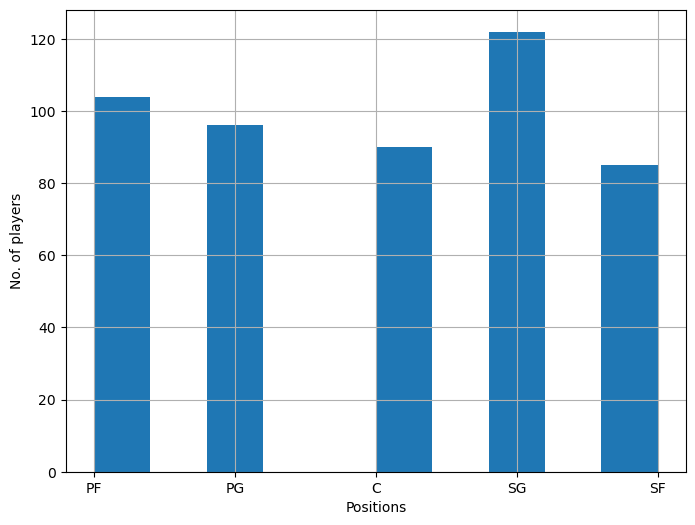

In [341]:
plt.figure(figsize = (8, 6))
plt.hist(df['Pos'])
plt.grid()
plt.xlabel('Positions')
plt.ylabel('No. of players')

#### Linear relationshop between variables using correlation heatmap

<Axes: >

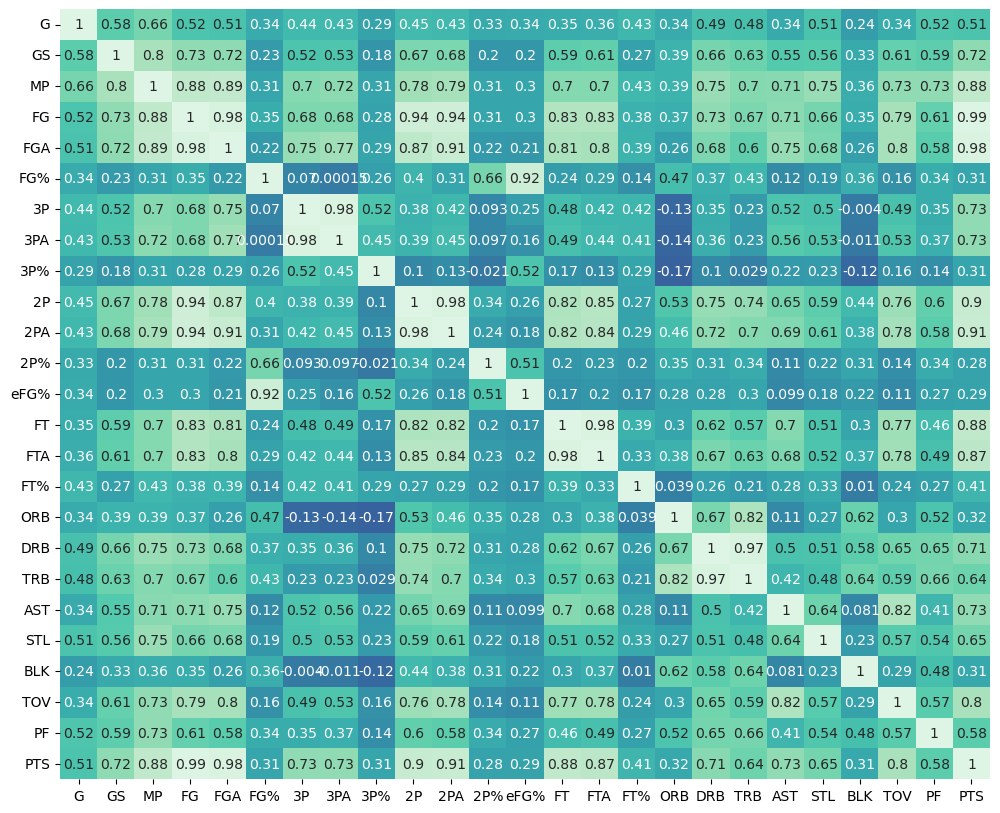

In [342]:
import seaborn as sns

plt.figure(figsize = (12, 10))
sns.heatmap(data = df.corr(numeric_only=True), annot = True, vmax = 1, vmin = -1, cbar = False, cmap = "mako")

The above heatmap shows that features such as: FG, FGA; 3P, 3PA; 2P, 2PA and FT, FTA are highly correlated. Therefore using either value should be good enough. For this assignment, all the "attempts" columns will be kept and the rest will be dropped. In addition,'DRB' has a high correlation with 'TRB'. Therefore, one of them will be dropped.

In [343]:
df.drop(['FG', 'FG%', '3P', '3P%', '2P', '2P%', 'FT', 'FT%', 'TRB'], axis = 1, inplace = True)

In [344]:
df.head()

,Pos,G,GS,MP,FGA,3PA,2PA,eFG%,FTA,ORB,DRB,AST,STL,BLK,TOV,PF,PTS
0,PF,28,2,14.6,4.4,0.0,4.4,0.590,2.4,1.3,2.7,0.6,0.4,0.5,1.0,1.9,6.5
1,PG,6,0,2.8,1.3,0.3,1.0,0.125,0.0,0.0,0.5,0.3,0.0,0.0,0.0,0.2,0.3
2,C,27,27,28.1,5.8,0.0,5.7,0.603,2.3,4.3,4.6,2.1,1.0,0.6,1.7,1.9,8.0
3,C,26,26,33.6,12.9,0.2,12.7,0.576,6.0,1.9,7.3,5.3,1.0,1.0,3.0,2.6,19.9
4,C,18,18,26.7,12.5,3.7,8.8,0.529,1.2,0.8,3.5,1.9,0.4,0.9,0.9,1.5,14.1


Although, the data originally had 27 attributes, we are down to 15. To check if Games Played(G), Games Started(GS) and Minutes Played(MP) are relevant for classificater, we will look at distributions for various Positions.

### Anaysis on points
#### Distributions for 3PA, 2PA, FGA, FTA, eFG% and PTS

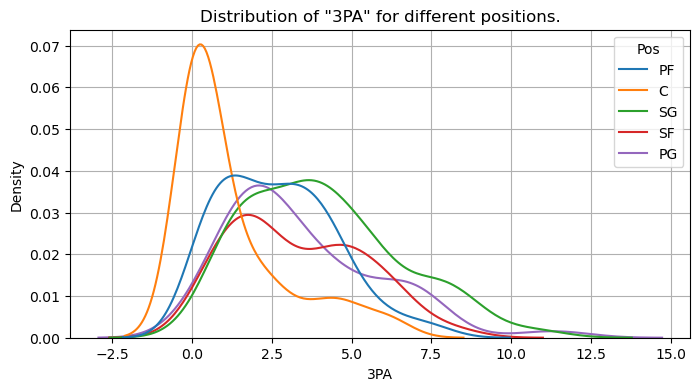

In [345]:
plt.figure(figsize = (8,4))
sns.kdeplot(df[df['MP'] > 4.0], x = '3PA', hue = 'Pos')
plt.title('Distribution of "3PA" for different positions.')
plt.grid()

In [346]:
print('Average:')
print(df[df['MP'] > 4.0].groupby('Pos').describe()['3PA']['mean'])
print('Std:')
print(df[df['MP'] > 4.0].groupby('Pos').describe()['3PA']['std'])

Average:
Pos
C     1.231461
PF    2.674737
PG    3.450562
SF    3.318182
SG    4.099107
Name: mean, dtype: float64
Std:
Pos
C     1.724726
PF    1.792358
PG    2.401047
SF    2.065298
SG    2.385108
Name: std, dtype: float64


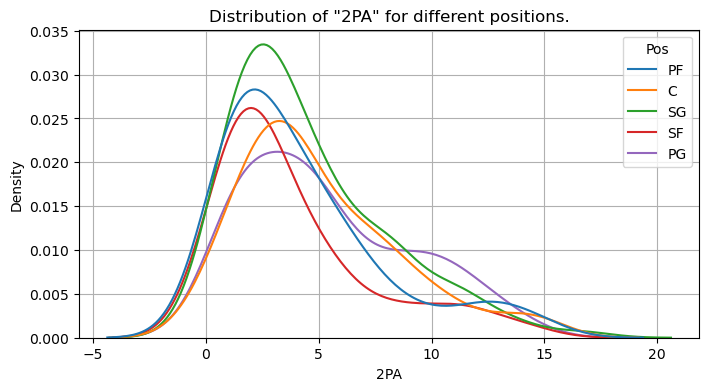

In [347]:
plt.figure(figsize = (8,4))
sns.kdeplot(df[df['MP'] > 4.0], x = '2PA', hue = 'Pos')
plt.title('Distribution of "2PA" for different positions.')
plt.grid()

In [348]:
print('Average:')
print(df[df['MP'] > 4.0].groupby('Pos').describe()['2PA']['mean'])
print('Std:')
print(df[df['MP'] > 4.0].groupby('Pos').describe()['2PA']['std'])

Average:
Pos
C     5.034831
PF    4.266316
PG    5.370787
SF    3.846753
SG    4.573214
Name: mean, dtype: float64
Std:
Pos
C     3.498444
PF    3.620674
PG    3.659583
SF    3.422202
SG    3.430835
Name: std, dtype: float64


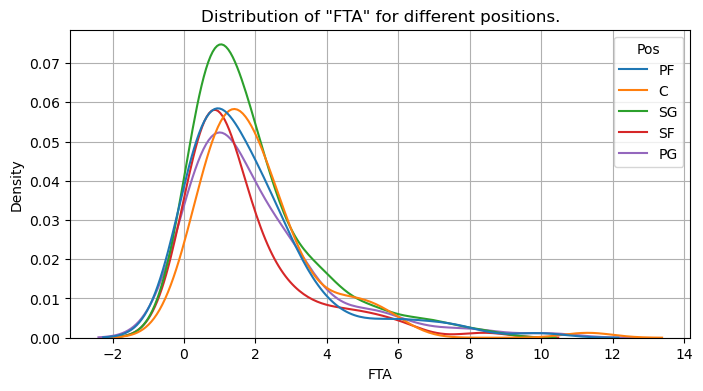

In [349]:
plt.figure(figsize = (8,4))
sns.kdeplot(df[df['MP'] > 4.0], x = 'FTA', hue = 'Pos')
plt.title('Distribution of "FTA" for different positions.')
plt.grid()

In [350]:
print('Average:')
print(df[df['MP'] > 4.0].groupby('Pos').describe()['FTA']['mean'])
print('Std:')
print(df[df['MP'] > 4.0].groupby('Pos').describe()['FTA']['std'])

Average:
Pos
C     2.082022
PF    1.897895
PG    2.022472
SF    1.672727
SG    1.942857
Name: mean, dtype: float64
Std:
Pos
C     1.702843
PF    1.872135
PG    1.958011
SF    1.648974
SG    1.713734
Name: std, dtype: float64


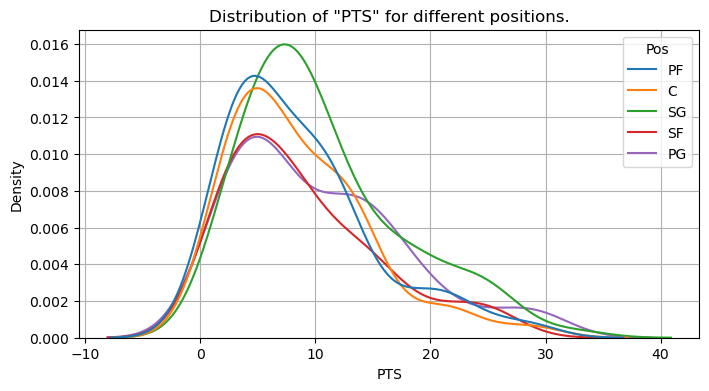

In [351]:
plt.figure(figsize = (8,4))
sns.kdeplot(df[df['MP'] > 4.0], x = 'PTS', hue = 'Pos')
plt.title('Distribution of "PTS" for different positions.')
plt.grid()

In [352]:
print('Average:')
print(df[df['MP'] > 4.0].groupby('Pos').describe()['PTS']['mean'])
print('Std:')
print(df[df['MP'] > 4.0].groupby('Pos').describe()['PTS']['std'])

Average:
Pos
C      8.665169
PF     8.724211
PG    10.429213
SF     9.000000
SG    10.721429
Name: mean, dtype: float64
Std:
Pos
C     6.120682
PF    6.433534
PG    7.418898
SF    6.606596
SG    6.936422
Name: std, dtype: float64


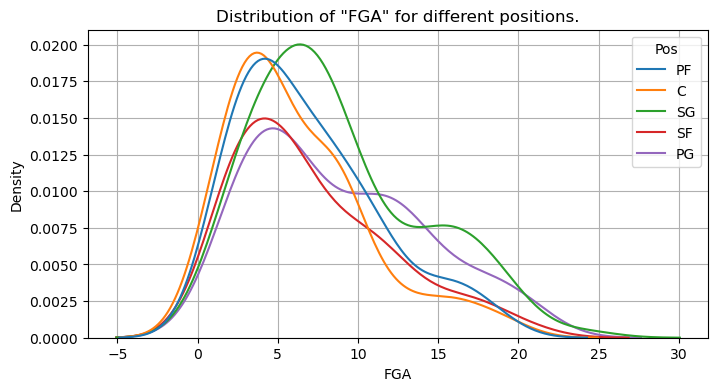

In [353]:
plt.figure(figsize = (8,4))
sns.kdeplot(df[df['MP'] > 4.0], x = 'FGA', hue = 'Pos')
plt.title('Distribution of "FGA" for different positions.')
plt.grid()

In [354]:
print('Average:')
print(df[df['MP'] > 4.0].groupby('Pos').describe()['FGA']['mean'])
print('Std:')
print(df[df['MP'] > 4.0].groupby('Pos').describe()['FGA']['std'])

Average:
Pos
C     6.266292
PF    6.943158
PG    8.814607
SF    7.158442
SG    8.662500
Name: mean, dtype: float64
Std:
Pos
C     4.372485
PF    4.453391
PG    5.348567
SF    4.822053
SG    5.191610
Name: std, dtype: float64


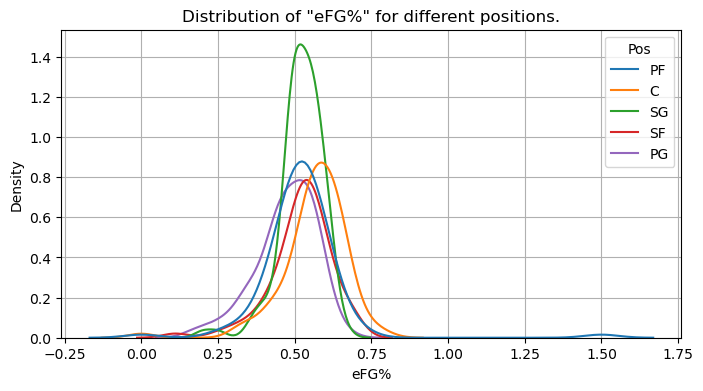

In [355]:
plt.figure(figsize = (8,4))
sns.kdeplot(df[df['MP'] > 4.0], x = 'eFG%', hue = 'Pos')
plt.title('Distribution of "eFG%" for different positions.')
plt.grid()

In [356]:
print('Average:')
print(df[df['MP'] > 4.0].groupby('Pos').describe()['eFG%']['mean'])
print('Std:')
print(df[df['MP'] > 4.0].groupby('Pos').describe()['eFG%']['std'])

Average:
Pos
C     0.564955
PF    0.520737
PG    0.472764
SF    0.520597
SG    0.522045
Name: mean, dtype: float64
Std:
Pos
C     0.106026
PF    0.139764
PG    0.097996
SF    0.099234
SG    0.070829
Name: std, dtype: float64


The distribution of 'FTA' and 'eFG%' is similar for all player positions; therefore, they will be dropped.

In [357]:
df.drop(['2PA', 'FTA'], axis = 1, inplace = True)

#### Distributions for Games Played(G), Games Started(GS) and Minutes Played(MP)

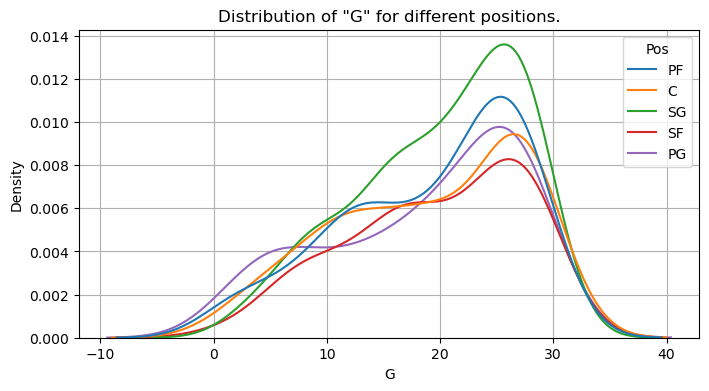

In [358]:
plt.figure(figsize = (8,4))
sns.kdeplot(df[df['MP'] > 4.0], x = 'G', hue = 'Pos')
plt.title('Distribution of "G" for different positions.')
plt.grid()

In [359]:
print('Average:')
print(df[df['MP'] > 4.0].groupby('Pos').describe()['G']['mean'])
print('Std:')
print(df[df['MP'] > 4.0].groupby('Pos').describe()['G']['std'])

Average:
Pos
C     19.101124
PF    19.252632
PG    18.662921
SF    19.649351
SG    19.991071
Name: mean, dtype: float64
Std:
Pos
C     8.161780
PF    7.922455
PG    8.501262
SF    7.620551
SG    7.182932
Name: std, dtype: float64


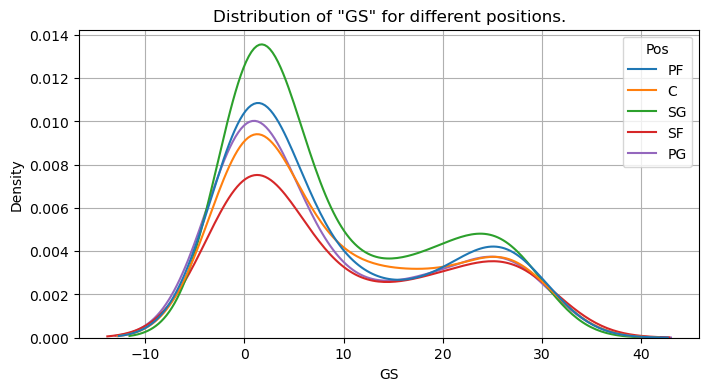

In [360]:
plt.figure(figsize = (8,4))
sns.kdeplot(df[df['MP'] > 4.0], x = 'GS', hue = 'Pos')
plt.title('Distribution of "GS" for different positions.')
plt.grid()

In [361]:
print('Average:')
print(df[df['MP'] > 4.0].groupby('Pos').describe()['GS']['mean'])
print('Std:')
print(df[df['MP'] > 4.0].groupby('Pos').describe()['GS']['std'])

Average:
Pos
C      9.494382
PF     9.105263
PG     8.853933
SF    10.116883
SG     9.044643
Name: mean, dtype: float64
Std:
Pos
C     10.444794
PF    10.487555
PG    10.618969
SF    10.970024
SG     9.913489
Name: std, dtype: float64


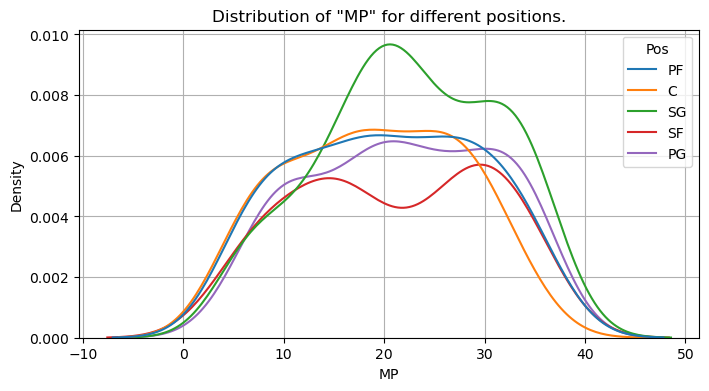

In [362]:
# check distribution of minutes played but only for datapoints where MP> 8 mins
plt.figure(figsize = (8,4))
sns.kdeplot(df[df['MP'] > 4.0], x = 'MP', hue = 'Pos')
plt.title('Distribution of "MP" for different positions.')
plt.grid()

In [363]:
print('Average:')
print(df[df['MP'] > 4.0].groupby('Pos').describe()['MP']['mean'])
print('Std:')
print(df[df['MP'] > 4.0].groupby('Pos').describe()['MP']['std'])

Average:
Pos
C     19.085393
PF    20.436842
PG    21.746067
SF    20.944156
SG    22.439286
Name: mean, dtype: float64
Std:
Pos
C     8.576760
PF    9.206243
PG    9.077733
SF    9.574438
SG    8.789453
Name: std, dtype: float64


The distribution of 'G', 'MP' and 'GS' is similar for all player positions; therefore, this attribute will be dropped.

In [364]:
df.drop(['G', 'GS'], axis = 1, inplace = True)

In [365]:
df.head(10)

,Pos,MP,FGA,3PA,eFG%,ORB,DRB,AST,STL,BLK,TOV,PF,PTS
0,PF,14.6,4.4,0.0,0.590,1.3,2.7,0.6,0.4,0.5,1.0,1.9,6.5
1,PG,2.8,1.3,0.3,0.125,0.0,0.5,0.3,0.0,0.0,0.0,0.2,0.3
2,C,28.1,5.8,0.0,0.603,4.3,4.6,2.1,1.0,0.6,1.7,1.9,8.0
3,C,33.6,12.9,0.2,0.576,1.9,7.3,5.3,1.0,1.0,3.0,2.6,19.9
4,C,26.7,12.5,3.7,0.529,0.8,3.5,1.9,0.4,0.9,0.9,1.5,14.1
5,SG,2.7,1.0,0.3,0.000,0.0,0.3,0.3,0.0,0.0,0.0,0.3,0.0
6,SG,19.2,8.2,3.8,0.473,0.2,2.4,2.0,1.1,0.3,1.3,1.7,8.8
7,SG,23.9,7.4,5.3,0.586,0.4,2.5,2.1,1.0,0.2,1.1,1.3,10.4
8,C,26.2,6.8,0.1,0.645,2.9,6.1,1.6,0.5,1.6,1.5,1.6,12.3
9,C,26.7,5.4,0.0,0.677,3.2,7.3,1.7,0.6,1.6,1.8,1.8,11.2


#### Distribution analysis for ORB,	DRB, AST, STL, BLK,	TOV	and PF

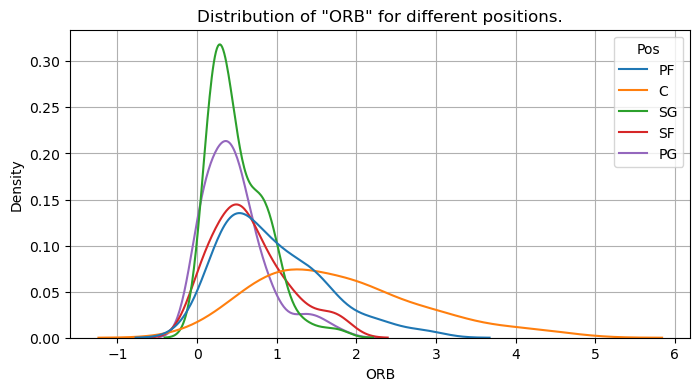

In [366]:
plt.figure(figsize = (8,4))
sns.kdeplot(df[df['MP'] > 4.0], x = 'ORB', hue = 'Pos')
plt.title('Distribution of "ORB" for different positions.')
plt.grid()

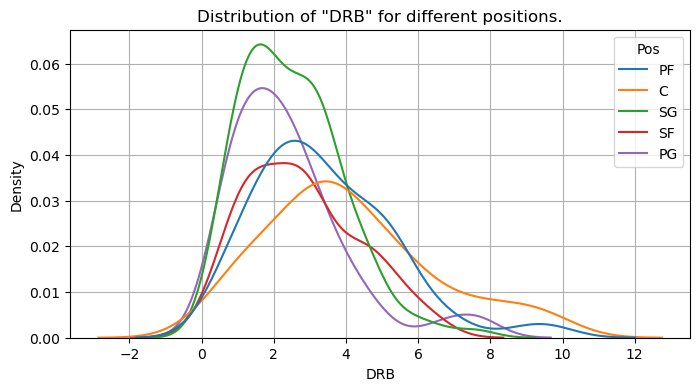

In [367]:
plt.figure(figsize = (8,4))
sns.kdeplot(df[df['MP'] > 4.0], x = 'DRB', hue = 'Pos')
plt.title('Distribution of "DRB" for different positions.')
plt.grid()

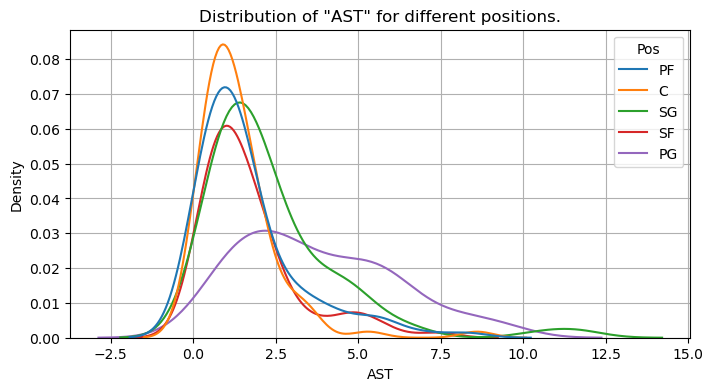

In [368]:
plt.figure(figsize = (8,4))
sns.kdeplot(df[df['MP'] > 4.0], x = 'AST', hue = 'Pos')
plt.title('Distribution of "AST" for different positions.')
plt.grid()

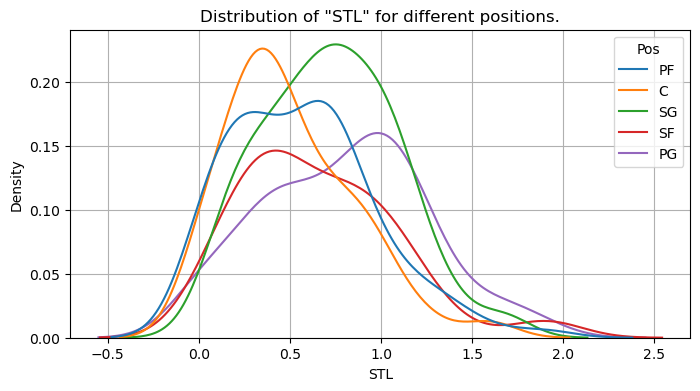

In [369]:
plt.figure(figsize = (8,4))
sns.kdeplot(df[df['MP'] > 4.0], x = 'STL', hue = 'Pos')
plt.title('Distribution of "STL" for different positions.')
plt.grid()

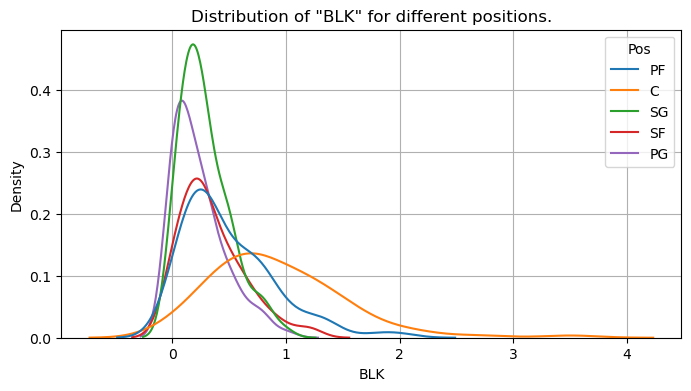

In [370]:
plt.figure(figsize = (8,4))
sns.kdeplot(df[df['MP'] > 4.0], x = 'BLK', hue = 'Pos')
plt.title('Distribution of "BLK" for different positions.')
plt.grid()

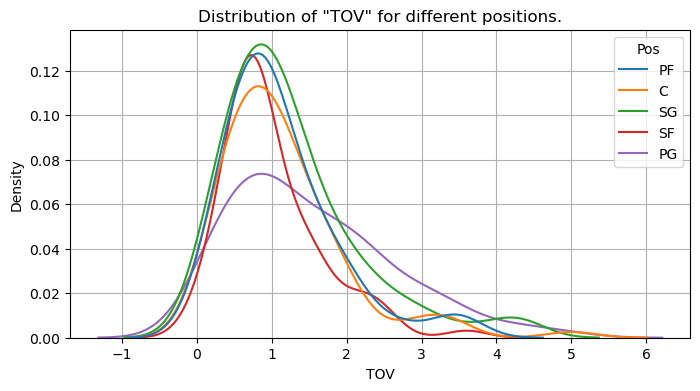

In [371]:
plt.figure(figsize = (8,4))
sns.kdeplot(df[df['MP'] > 4.0], x = 'TOV', hue = 'Pos')
plt.title('Distribution of "TOV" for different positions.')
plt.grid()

In [372]:
print('Average:')
print(df[df['MP'] > 4.0].groupby('Pos').describe()['TOV']['mean'])
print('Std:')
print(df[df['MP'] > 4.0].groupby('Pos').describe()['TOV']['std'])

Average:
Pos
C     1.135955
PF    1.114737
PG    1.526966
SF    1.000000
SG    1.251786
Name: mean, dtype: float64
Std:
Pos
C     0.827956
PF    0.761014
PG    1.070765
SF    0.651516
SG    0.912178
Name: std, dtype: float64


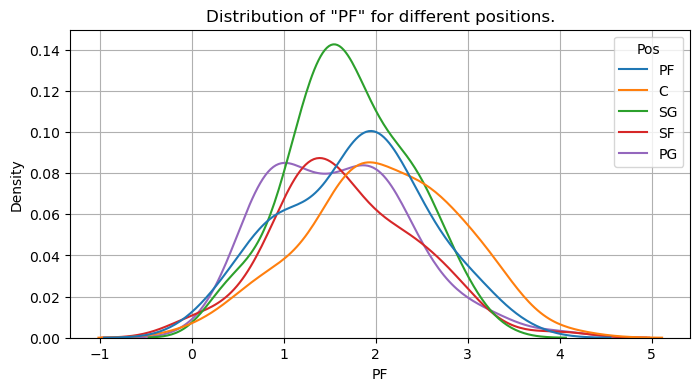

In [373]:
plt.figure(figsize = (8,4))
sns.kdeplot(df[df['MP'] > 4.0], x = 'PF', hue = 'Pos')
plt.title('Distribution of "PF" for different positions.')
plt.grid()

In [374]:
print('Average:')
print(df[df['MP'] > 4.0].groupby('Pos').describe()['PF']['mean'])
print('Std:')
print(df[df['MP'] > 4.0].groupby('Pos').describe()['PF']['std'])

Average:
Pos
C     2.070787
PF    1.766316
PG    1.597753
SF    1.664935
SG    1.708929
Name: mean, dtype: float64
Std:
Pos
C     0.828361
PF    0.788563
PG    0.767963
SF    0.772175
SG    0.656849
Name: std, dtype: float64


Out of all the distributions above, 'TOV', and 'PF' look very similar for all positions. Therefore, they will be dropped. 'BLK' and 'MP' will also be dropped.

In [375]:
df.drop(['TOV', 'PF', 'MP'], axis = 1, inplace = True)

In [376]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 497 entries, 0 to 496
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pos     497 non-null    object 
 1   FGA     497 non-null    float64
 2   3PA     497 non-null    float64
 3   eFG%    497 non-null    float64
 4   ORB     497 non-null    float64
 5   DRB     497 non-null    float64
 6   AST     497 non-null    float64
 7   STL     497 non-null    float64
 8   BLK     497 non-null    float64
 9   PTS     497 non-null    float64
dtypes: float64(9), object(1)
memory usage: 39.0+ KB


## Model Selection

As our data has a lot of attributes, using KNN and Logistic Regression requires standardization and distance predictions may get expensive. On the other hand, linear SVM would be much faster but require the classes to be separated by a linear descision boundary. Although descision trees and random forests are prone to overfitting, it can be avoided by using a tree of a fixed depth and validation process.

The following models will be trained and tested 10 times over different stratified train/test splits of 75/25 and the model with the highest average test accuracy will be selected.

### Get encoded labels and split data

In [377]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [378]:
# initialize label encoder and transform labels
le = LabelEncoder()
transformed_labels = pd.Series(le.fit_transform(df['Pos'].tolist()), name = "Position")

In [379]:
# add encoded labels as a new column and drop previous position column
df["Position"] = transformed_labels
df.drop(['Pos'], axis = 1, inplace = True)

In [380]:
X = df.drop(['Position'], axis = 1)
y = df['Position']    

In [471]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, stratify = y)

In [472]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 372 entries, 192 to 18
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   FGA     372 non-null    float64
 1   3PA     372 non-null    float64
 2   eFG%    372 non-null    float64
 3   ORB     372 non-null    float64
 4   DRB     372 non-null    float64
 5   AST     372 non-null    float64
 6   STL     372 non-null    float64
 7   BLK     372 non-null    float64
 8   PTS     372 non-null    float64
dtypes: float64(9)
memory usage: 29.1 KB


### 1) Descision Tree

In [473]:
from sklearn.tree import DecisionTreeClassifier

In [474]:
# create models with various depths
dtrees_list = []

d_vals = list(range(2, 50))

for d in d_vals:
    dtrees_list.append(DecisionTreeClassifier(max_depth = d))
    
# train all trees
for dtree in dtrees_list:
    dtree.fit(X_train, y_train)

In [475]:
# get training and test accuracy for all trees
tr_acc = []
test_acc = []

for dtree in dtrees_list:
    tr_acc.append(dtree.score(X_train, y_train))
    test_acc.append(dtree.score(X_test, y_test))

#### Plot training vs test accuracy for various depths

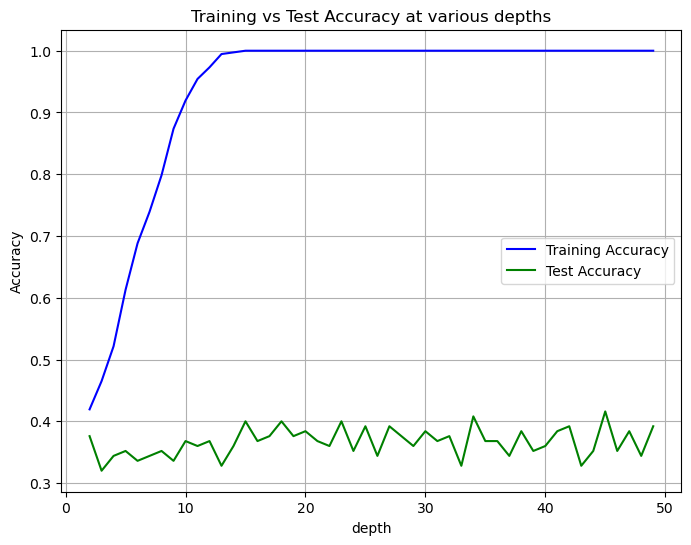

In [476]:
plt.figure(figsize = (8, 6))
plt.plot(d_vals, tr_acc, color = "blue")
plt.plot(d_vals, test_acc, color = "green")
plt.grid()
plt.title('Training vs Test Accuracy at various depths')
plt.xlabel('depth')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy', 'Test Accuracy'])

In [477]:
# get maximum accuracy value
max_val = max(tr_acc)
idx = tr_acc.index(max_val)
print(f'The maximum accuracy for training is {max(tr_acc):0.3f} for a depth of = {d_vals[idx]}.')

max_val = max(test_acc)
idx = test_acc.index(max_val)
print(f'The maximum accuracy for test is {max(test_acc):0.3f} for a depth of = {d_vals[idx]}.')

The maximum accuracy for training is 1.000 for a depth of = 15.
The maximum accuracy for test is 0.416 for a depth of = 45.


### 2) Random Forests Classifier

In [478]:
from sklearn.ensemble import RandomForestClassifier

In [479]:
# create models with various estimators
rf_list = []
depth_list = list(range(3, 20))
depth_list.append(None)

for d in depth_list:
    rf_list.append(RandomForestClassifier(n_estimators = 50, max_depth = d))
    
# train all trees
for rf_model in rf_list:
    rf_model.fit(X_train, y_train)

In [480]:
# get training and test accuracy for all trees
tr_acc = []
test_acc = []

for rf_model in rf_list:
    tr_acc.append(rf_model.score(X_train, y_train))
    test_acc.append(rf_model.score(X_test, y_test))

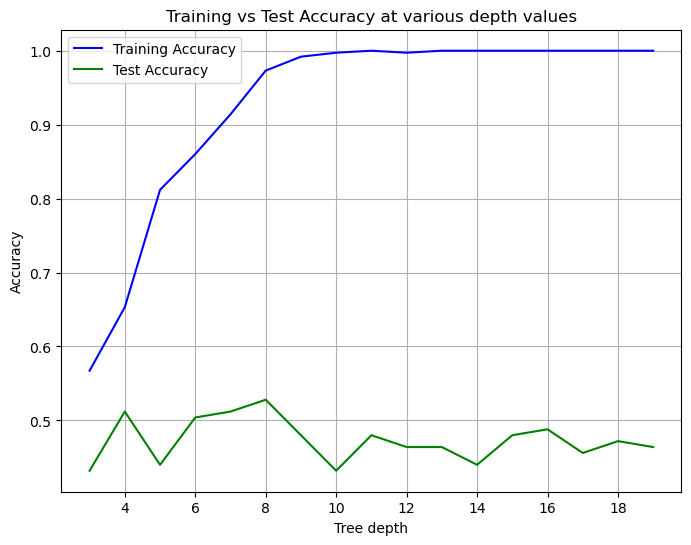

In [481]:
plt.figure(figsize = (8, 6))
plt.plot(depth_list, tr_acc, color = "blue")
plt.plot(depth_list, test_acc, color = "green")
plt.grid()
plt.title('Training vs Test Accuracy at various depth values')
plt.xlabel('Tree depth')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy', 'Test Accuracy'])

In [482]:
# get maximum accuracy value
max_val = max(tr_acc)
idx = tr_acc.index(max_val)
print(f'The maximum accuracy for training is {max(tr_acc):0.3f} for a depth of {depth_list[idx]}.')

max_val = max(test_acc)
idx = test_acc.index(max_val)
print(f'The maximum accuracy for test is {max(test_acc):0.3f} for a depth of {depth_list[idx]}.')

The maximum accuracy for training is 1.000 for a depth of 11.
The maximum accuracy for test is 0.528 for a depth of 8.


### 3) Logistic Regression

In [483]:
from sklearn.linear_model import LogisticRegression

In [484]:
# import scaler
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [485]:
sc = StandardScaler()
mc = MinMaxScaler()
X_train_norm = mc.fit_transform(X_train)
X_test_norm = mc.transform(X_test)

In [486]:
# create models with various depths
lr_list = []

C_list = list(range(1, 35))

for C in C_list:
    lr_list.append(LogisticRegression(C = C, max_iter = 200))
    
# train all trees
for lr_model in lr_list:
    lr_model.fit(X_train_norm, y_train)

In [487]:
# get training and test accuracy for all trees
tr_acc = []
test_acc = []

for lr_model in lr_list:
    tr_acc.append(lr_model.score(X_train_norm, y_train))
    test_acc.append(lr_model.score(X_test_norm, y_test))

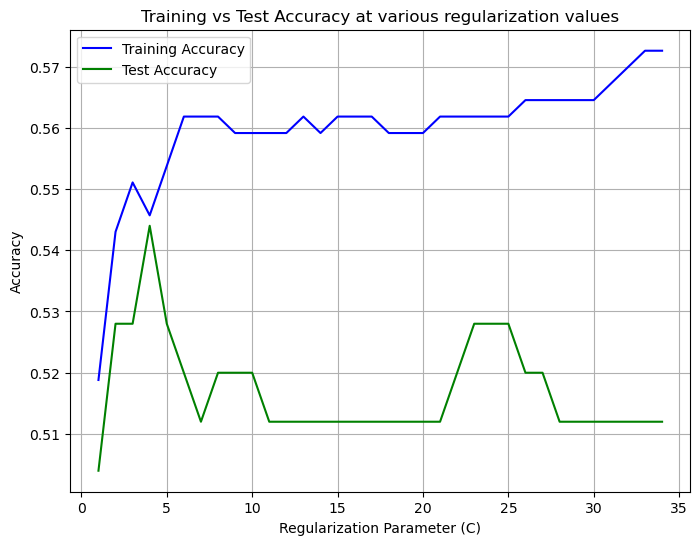

In [488]:
plt.figure(figsize = (8, 6))
plt.plot(C_list, tr_acc, color = "blue")
plt.plot(C_list, test_acc, color = "green")
plt.grid()
plt.title('Training vs Test Accuracy at various regularization values')
plt.xlabel('Regularization Parameter (C)')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy', 'Test Accuracy'])

In [489]:
# get maximum accuracy value
max_val = max(tr_acc)
idx = tr_acc.index(max_val)
print(f'The maximum accuracy for training is {max(tr_acc):0.3f} for a C of {C_list[idx]}.')

max_val = max(test_acc)
idx = test_acc.index(max_val)
print(f'The maximum accuracy for test is {max(test_acc):0.3f} for a C of {C_list[idx]}.')

The maximum accuracy for training is 0.573 for a C of 33.
The maximum accuracy for test is 0.544 for a C of 4.


### 4) SVM

In [490]:
from sklearn.svm import SVC

In [491]:
# create models with various depths
svm_list = []

C_list = list(range(1, 35))

for C in C_list:
    svm_list.append(SVC(C = C, kernel = 'linear'))
    
# train all trees
for svm_model in svm_list:
    svm_model.fit(X_train, y_train)

In [492]:
# get training and test accuracy for all trees
tr_acc = []
test_acc = []

for svm_model in svm_list:
    tr_acc.append(svm_model.score(X_train, y_train))
    test_acc.append(svm_model.score(X_test, y_test))

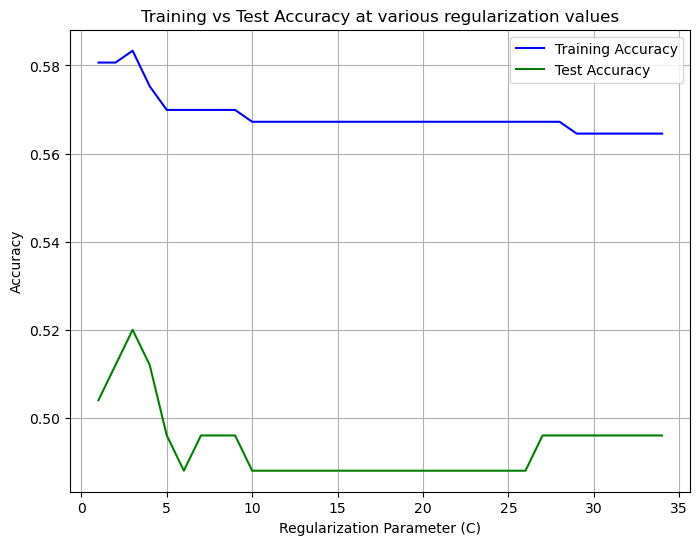

In [493]:
plt.figure(figsize = (8, 6))
plt.plot(C_list, tr_acc, color = "blue")
plt.plot(C_list, test_acc, color = "green")
plt.grid()
plt.title('Training vs Test Accuracy at various regularization values')
plt.xlabel('Regularization Parameter (C)')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy', 'Test Accuracy'])

In [494]:
# get maximum accuracy value
max_val = max(tr_acc)
idx = tr_acc.index(max_val)
print(f'The maximum accuracy for training is {max(tr_acc):0.3f} for a C of {C_list[idx]}.')

max_val = max(test_acc)
idx = test_acc.index(max_val)
print(f'The maximum accuracy for test is {max(test_acc):0.3f} for a C of {C_list[idx]}.')

The maximum accuracy for training is 0.583 for a C of 3.
The maximum accuracy for test is 0.520 for a C of 3.


### 5) KNN

In [495]:
from sklearn.neighbors import KNeighborsClassifier

In [496]:
knn_list = []
k_list = list(range(1, 20))
for k in k_list:
    knn_list.append(KNeighborsClassifier(n_neighbors=k))


In [497]:
# train all trees
for knn_model in knn_list:
    knn_model.fit(X_train_norm, y_train)

In [498]:
# get training and test accuracy for all trees
tr_acc = []
test_acc = []

for knn_model in knn_list:
    tr_acc.append(knn_model.score(X_train_norm, y_train))
    test_acc.append(knn_model.score(X_test_norm, y_test))

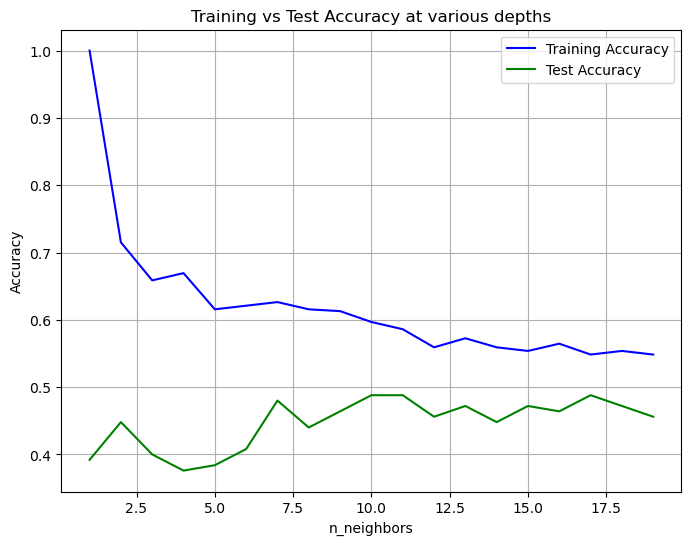

In [499]:
plt.figure(figsize = (8, 6))
plt.plot(k_list, tr_acc, color = "blue")
plt.plot(k_list, test_acc, color = "green")
plt.grid()
plt.title('Training vs Test Accuracy at various depths')
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy', 'Test Accuracy'])

In [500]:
# get maximum accuracy value
max_val = max(tr_acc)
idx = tr_acc.index(max_val)
print(f'The maximum accuracy for training is {max(tr_acc):0.3f} for a K of {k_list[idx]}.')

max_val = max(test_acc)
idx = test_acc.index(max_val)
print(f'The maximum accuracy for test is {max(test_acc):0.3f} for a K of {k_list[idx]}.')

The maximum accuracy for training is 1.000 for a K of 1.
The maximum accuracy for test is 0.488 for a K of 10.


### Conclusion
The best average test accuracy was obtained for Logistic Regression with a regularization parameter of C = 2; therefore, it was used as the final model for cross validation process. 